# Stationary bandit problem

In this section we execute K-bandit problems, using n=10 (number of "arms").
The different values of *epsilon* indicate the level of exploration (0 corresponding with the greedy approach).

With each epsilon value, 2000 problems of 1000 steps each are executed, and then the results are averaged in each step for the 2000 problems.

In [1]:
from kbandit import generate_kbandit, run_problem, EpsilonStrategy
from matplotlib import pyplot as plt

In [3]:
rewards, best_actions = [], []
epsilons = (0.0, 0.1, 0.01)
# Generate kbandit problems of 10 arms
k = 10
problem_factory = lambda: generate_kbandit(k)
for epsilon in epsilons:
    strategy_factory = lambda: EpsilonStrategy(epsilon=epsilon, k=k)
    reward, best_action = run_problem(steps=1000, n=2000, problem_factory=problem_factory, strategy_factory=strategy_factory)
    rewards.append(reward)
    best_actions.append(best_action)

n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:20<00:00, 96.79it/s]


n: 2000, steps: 1000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 100.21it/s]


n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:20<00:00, 97.28it/s]


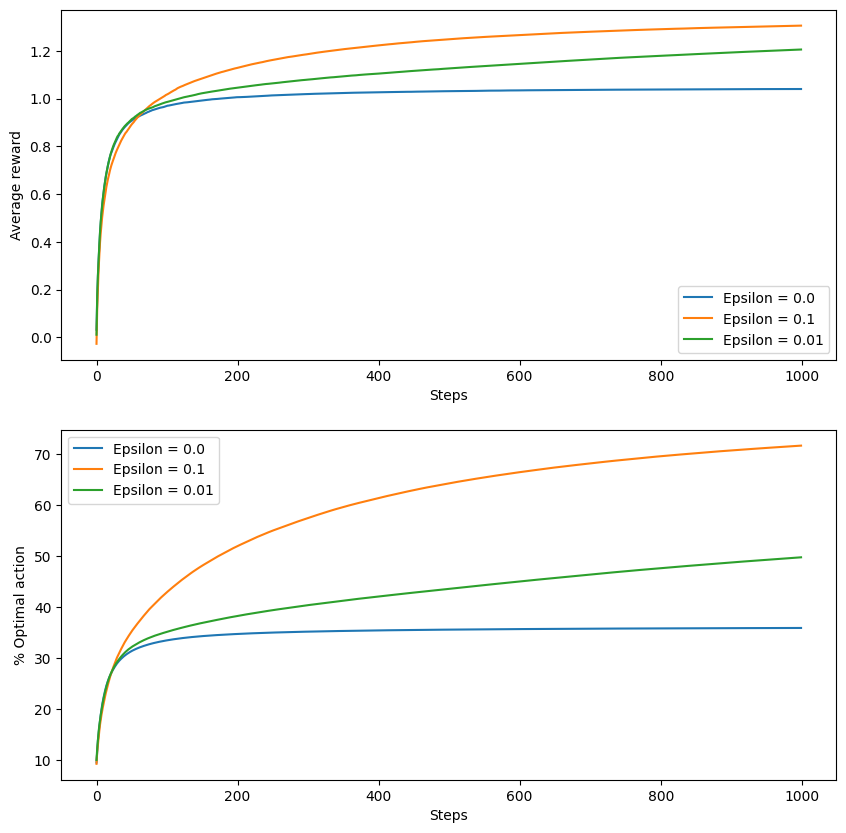

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("Steps")
plt.ylabel("Average reward")
for reward, epsilon in zip(rewards, epsilons):
    plt.plot(reward, label=f"Epsilon = {epsilon}")
plt.legend()

plt.subplot(212)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
for best_action, epsilon in zip(best_actions, epsilons):
    best_action *= 100.0
    plt.plot(best_action, label=f"Epsilon = {epsilon}")

plt.legend()
plt.show()

# Non-stationary bandit problem

In [6]:
from kbandit import KbanditNonStationary

In [7]:
# Generate non-stationary kbandit problems of 10 arms
k = 10
problem_factory = lambda: KbanditNonStationary([0.0]*k)
strategy_factory = lambda: EpsilonStrategy(epsilon=0.1, k=k)
print("step_size: 1/k")
reward, best_action = run_problem(steps=5000, n=2000, problem_factory=problem_factory, strategy_factory=strategy_factory)
print("step_size: 0.1")
strategy_factory = lambda: EpsilonStrategy(epsilon=0.1, k=k, step_size=0.1)
reward_ct, best_action_ct = run_problem(steps=5000, n=2000, problem_factory=problem_factory, strategy_factory=strategy_factory)

step_size: 1/k
n: 2000, steps: 5000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:43<00:00, 12.26it/s]


step_size: 0.1
n: 2000, steps: 5000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:42<00:00, 12.30it/s]


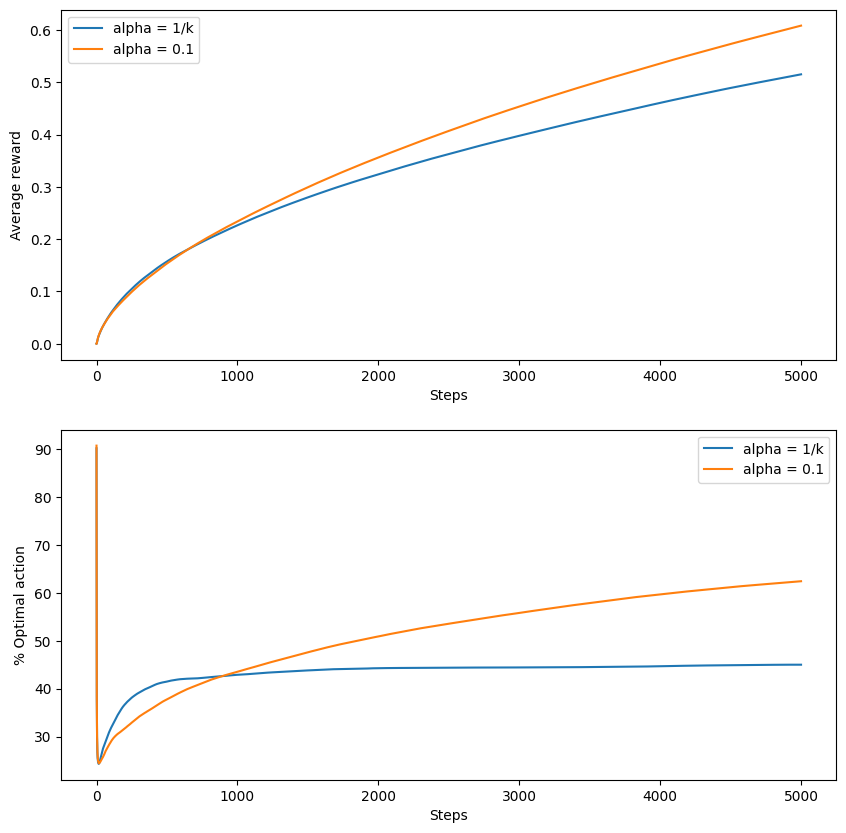

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.plot(reward, label=f"alpha = 1/k")
plt.plot(reward_ct, label=f"alpha = 0.1")
plt.legend()

plt.subplot(212)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
best_action *= 100.0
plt.plot(best_action, label=f"alpha = 1/k")
best_action_ct *= 100.0
plt.plot(best_action_ct, label=f"alpha = 0.1")

plt.legend()
plt.show()

# Optimistic Initial Values

In [12]:
k = 10
problem_factory = lambda: generate_kbandit(k)
strategy_factory = lambda: EpsilonStrategy(epsilon=0.1, k=k)
print("realistic non-greedy")
reward, best_action = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)
print("optimistic greedy")
initial_estimates = [5.0]*k
strategy_factory = lambda: EpsilonStrategy(epsilon=0.1, k=k, initial_estimates=initial_estimates)
reward_ct, best_action_ct = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)

realistic non-greedy
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:20<00:00, 99.28it/s]


optimistic greedy
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:20<00:00, 98.50it/s]


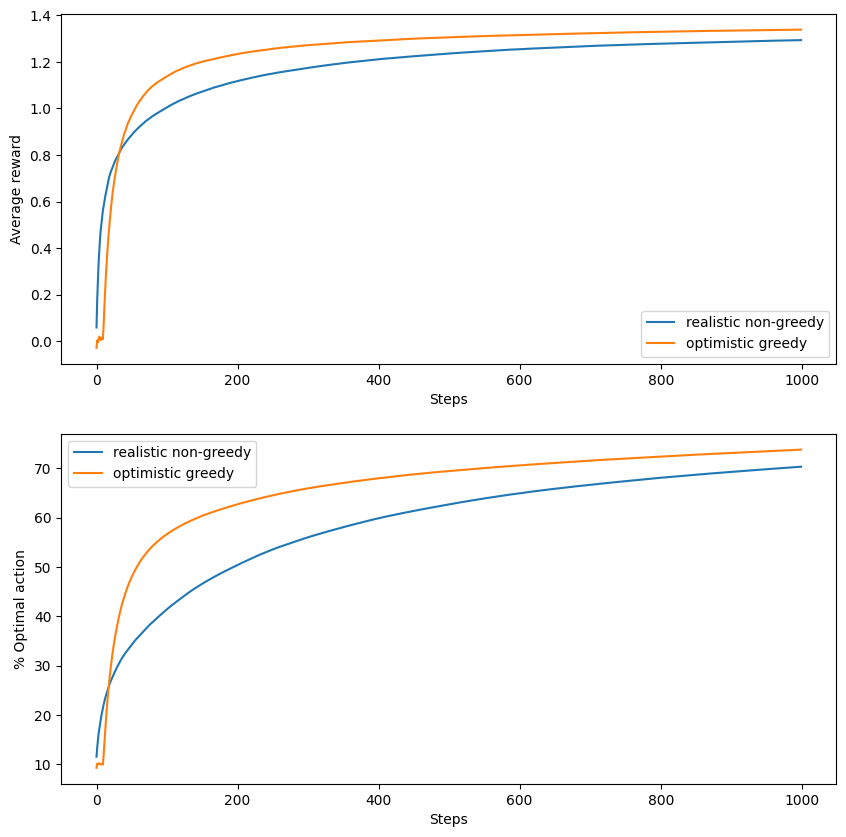

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.plot(reward, label=f"realistic non-greedy")
plt.plot(reward_ct, label=f"optimistic greedy")
plt.legend()

plt.subplot(212)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
best_action *= 100.0
plt.plot(best_action, label=f"realistic non-greedy")
best_action_ct *= 100.0
plt.plot(best_action_ct, label=f"optimistic greedy")

plt.legend()
plt.show()

# Upper-Confidence-Bound Action Selection

In [14]:
from kbandit import UCBStrategy

In [15]:
k = 10
problem_factory = lambda: generate_kbandit(k)
strategy_factory = lambda: EpsilonStrategy(epsilon=0.1, k=10)
print("epsilon-greedy (0.1)")
reward, best_action = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)
print("UCB c=2")
strategy_factory = lambda: UCBStrategy(c=2, k=10)
reward_ucb, best_action_ucb = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)

epsilon-greedy (0.1)
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:20<00:00, 99.77it/s]


UCB c=2
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:32<00:00, 61.33it/s]


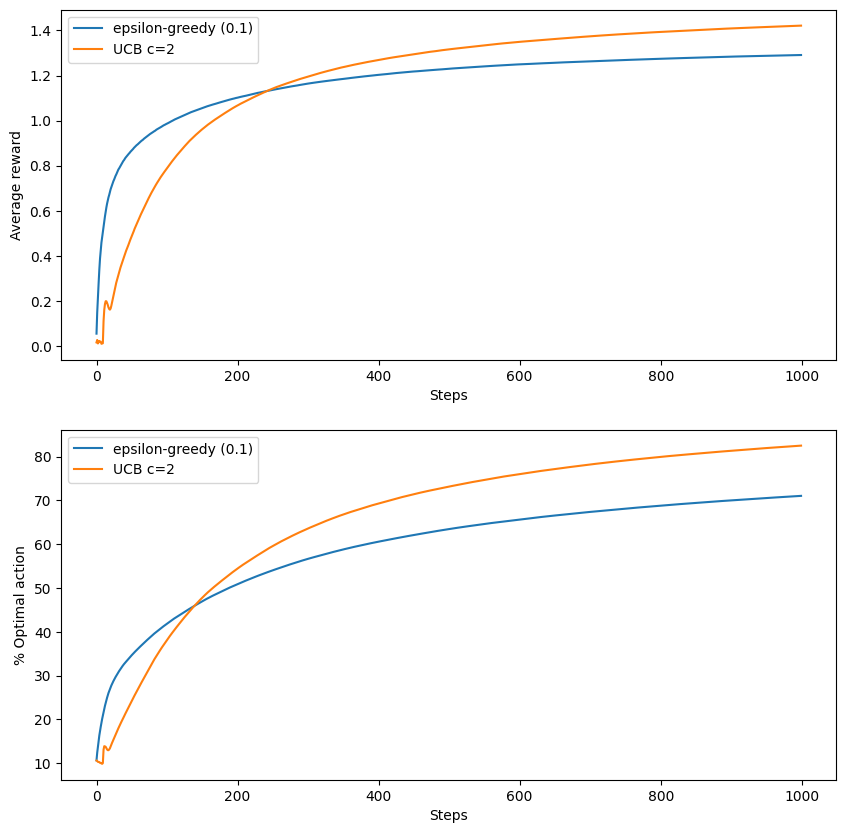

In [16]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.plot(reward, label="epsilon-greedy (0.1)")
plt.plot(reward_ucb, label="UCB c=2")
plt.legend()

plt.subplot(212)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
best_action *= 100.0
plt.plot(best_action, label="epsilon-greedy (0.1)")
best_action_ucb *= 100.0
plt.plot(best_action_ucb, label="UCB c=2")

plt.legend()
plt.show()

# Gradient Bandits

In [2]:
from kbandit import GradientStrategy

In [6]:
k = 10
problem_factory = lambda: generate_kbandit(k, avg_reward=4.0)

strategy_factory = lambda: GradientStrategy(k=k, step_size=0.1)
print("gradient (step_size=0.1)")
reward, best_action = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)
print("gradient (step_size=0.4)")
strategy_factory = lambda: GradientStrategy(k=k, step_size=0.4)
reward_2, best_action_2 = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)

strategy_factory = lambda: GradientStrategy(k=k, step_size=0.1, baseline=0.0)
print("gradient (step_size=0.1, baseline=0.0)")
reward_3, best_action_3 = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)
print("gradient (step_size=0.4, baseline=0.0)")
strategy_factory = lambda: GradientStrategy(k=k, step_size=0.4, baseline=0.0)
reward_4, best_action_4 = run_problem(steps=1000, n=2000, strategy_factory=strategy_factory, problem_factory=problem_factory)

gradient (step_size=0.1)
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:28<00:00, 22.72it/s]


gradient (step_size=0.4)
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:27<00:00, 22.78it/s]


gradient (step_size=0.1, baseline=0.0)
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:31<00:00, 21.76it/s]


gradient (step_size=0.4, baseline=0.0)
n: 2000, steps: 1000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:32<00:00, 21.66it/s]


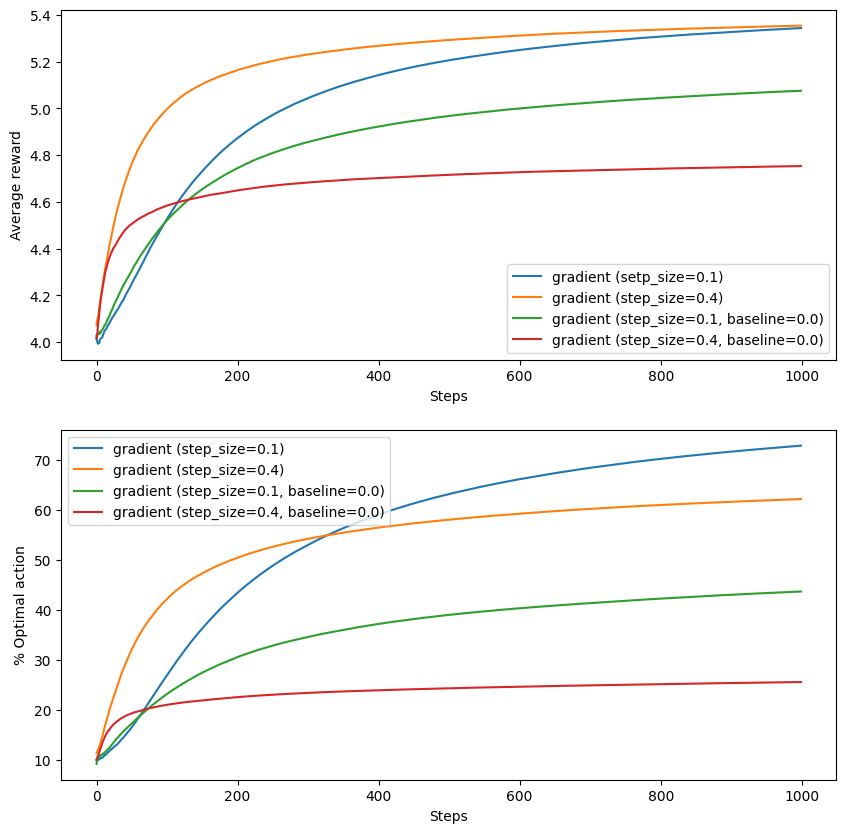

In [7]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.plot(reward, label="gradient (setp_size=0.1)")
plt.plot(reward_2, label="gradient (step_size=0.4)")
plt.plot(reward_3, label="gradient (step_size=0.1, baseline=0.0)")
plt.plot(reward_4, label="gradient (step_size=0.4, baseline=0.0)")
plt.legend()

plt.subplot(212)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
best_action *= 100.0
plt.plot(best_action, label="gradient (step_size=0.1)")
best_action_2 *= 100.0
plt.plot(best_action_2, label="gradient (step_size=0.4)")
best_action_3 *= 100.0
plt.plot(best_action_3, label="gradient (step_size=0.1, baseline=0.0)")
best_action_4 *= 100.0
plt.plot(best_action_4, label="gradient (step_size=0.4, baseline=0.0)")

plt.legend()
plt.show()